In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/crypto-markets.csv')
df['date'] = pd.to_datetime(df['date'])
btc_data = df.loc[df['symbol'] == 'BTC']
sorted_btc_data = btc_data.sort_values('date', ascending= False)
sorted_btc_data

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
2041,bitcoin,BTC,Bitcoin,2018-11-29,1,4269.00,4413.02,4145.77,4278.85,6.503348e+09,7.445102e+10,0.4980,267.25
2040,bitcoin,BTC,Bitcoin,2018-11-28,1,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,0.7720,563.43
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49


In [3]:
# Function to split dataset by specific date
def split_train_test(df, date='2017-11-28'):
    train = df.loc[df['date'] < date].reset_index(drop=True)
    test = df.loc[df['date'] >= date].reset_index(drop=True)
    return train, test

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error as mse
from sklearn.metrics import explained_variance_score, max_error, r2_score
from sklearn.metrics import root_mean_squared_error

# Filter just for the BTC
btc_data = df.loc[df['symbol'] == 'BTC']

#Sorted the data according the date
sorted_btc_data = btc_data.sort_values('date', ascending=False)

#Get the previous days value
sorted_btc_data['T-1'] = sorted_btc_data['close'].shift(-1)
sorted_btc_data['T-2'] = sorted_btc_data['close'].shift(-2)
sorted_btc_data['T-3'] = sorted_btc_data['close'].shift(-3)
# Calculate the rolling closing price
sorted_btc_data['mean_price_3_days'] = sorted_btc_data['close'].rolling(window=3, min_periods=1).mean()

train, test = split_train_test(sorted_btc_data)
X_train_new = train[['T-1', 'T-2', 'T-3']].fillna(0)
y_train = train['close']
X_test_new = test[['T-1', 'T-2', 'T-3']].fillna(0)
y_test = test['close']

# Normalize the data using the MinMaxScalar
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_new)
X_test_normalized = scaler.transform(X_test_new)
#Define LinearRegression and fit the X and 
lm = LinearRegression()
lm.fit(X_train_normalized, y_train)
# Predict the target value with the test data
predicted = lm.predict(X_test_normalized)
# Calculate the metrics
explained_variance = explained_variance_score(y_test, predicted)
max_error_value = max_error(y_test, predicted)
r_squared = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = root_mean_squared_error(y_test, predicted)
#Print the metrics
print(f"Explained Variance: {explained_variance}")
print(f"Max Error: {max_error_value}")
print(f"R-Squared: {r_squared}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
#Print the mean closing price for the data
print(f'Mean of the close prices: {test["close"].mean()}')


Explained Variance: 0.9689186893790407
Max Error: 3281.019134100654
R-Squared: 0.9678610341291737
Mean Absolute Error (MAE): 328.06449842699163
Mean Squared Error (MSE): 296458.6835581747
Root Mean Squared Error (RMSE): 544.4801957446889
Mean of the close prices: 8580.19923705722


The model's predictions are on average 328.06 USD away from the actual values (MAE), which is 3.82% of the average close price (8580.20 USD). This indicates a relatively good model

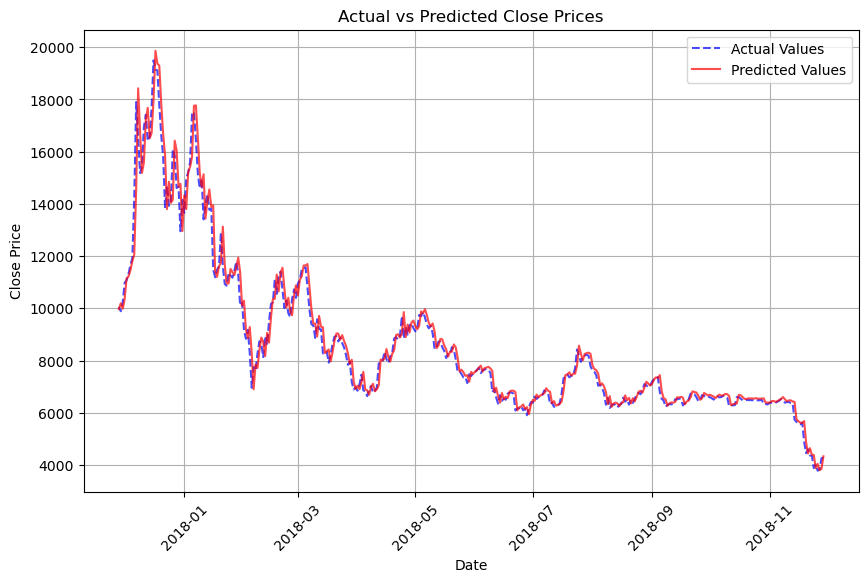

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test['date'], y_test.values, label='Actual Values', color='blue', linestyle='dashed', alpha=0.7)
plt.plot(test['date'], predicted, label='Predicted Values', color='red', alpha=0.7)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()